In [1]:
# 상수와 텐서
import tensorflow as tf
import numpy as np

In [2]:
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
x = tf.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [4]:
# 랜덤 텐서
x = tf.random.normal(shape=(3,1),mean=0,stddev=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-1.5438585 ],
       [ 1.4191318 ],
       [ 0.91515946]], dtype=float32)>

In [5]:
x = tf.random.uniform(shape=(3,1),minval=0,maxval=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.44878483],
       [0.04787076],
       [0.26899707]], dtype=float32)>

In [6]:
# numpy에 값 할당
x = np.ones(shape=(2,2))
x[0,0] = 0
x

array([[0., 1.],
       [1., 1.]])

In [7]:
# Tensorflow 변수 만들기
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.061588  ],
       [0.31856427],
       [1.2149783 ]], dtype=float32)>

In [8]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
# 변수 일부에 값 할당
v[0,0].assign(3)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [10]:
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [11]:
# Tensorflow 기본적인 수학연산
a = tf.ones((2,2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(b)
print(c)
d = b + c
print(d)
e = tf.matmul(a,d)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [12]:
from numpy.lib.function_base import gradient
# GradientTape 사용
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)

In [14]:
# 중첩
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time**2
  speed = inner_tape.gradient(position,time) 
acceleration = outer_tape.gradient(speed,time)

In [15]:
# Tensorflow 선형 분류기
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [16]:
negative_samples.shape

(1000, 2)

In [17]:
# 한 배열에 쌓기
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [18]:
inputs.shape

(2000, 2)

In [19]:
# 0과 1로 되어있는 타깃을 구성
targets = np.vstack((np.zeros((1000,1),dtype='float32'),
                     np.ones((1000,1),dtype='float32')))

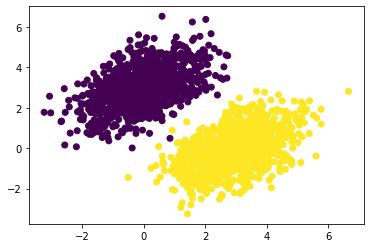

In [20]:
# 샘플 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [21]:
# 선형 분류기의 변수 
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [22]:
# 정방향 패스 함수
def model(inputs):
  return tf.matmul(inputs,W) + b

In [23]:
# 평균 제곱 오차 손실함수
def squared_loss(target,predictions):
  per_sample_losses = tf.square(target-predictions)
  return tf.reduce_mean(per_sample_losses)

In [24]:
# 스텝 훈련 함수
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = squared_loss(targets,predictions)
  grad_loss_wrd_W, grad_loss_wrd_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrd_W*learning_rate)
  b.assign_sub(grad_loss_wrd_b*learning_rate)
  return loss

In [25]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 0.6134
1번째 스텝의 손실 : 0.1244
2번째 스텝의 손실 : 0.0948
3번째 스텝의 손실 : 0.0867
4번째 스텝의 손실 : 0.0811
5번째 스텝의 손실 : 0.0762
6번째 스텝의 손실 : 0.0717
7번째 스텝의 손실 : 0.0676
8번째 스텝의 손실 : 0.0638
9번째 스텝의 손실 : 0.0604
10번째 스텝의 손실 : 0.0573
11번째 스텝의 손실 : 0.0544
12번째 스텝의 손실 : 0.0518
13번째 스텝의 손실 : 0.0494
14번째 스텝의 손실 : 0.0473
15번째 스텝의 손실 : 0.0453
16번째 스텝의 손실 : 0.0435
17번째 스텝의 손실 : 0.0418
18번째 스텝의 손실 : 0.0403
19번째 스텝의 손실 : 0.0389
20번째 스텝의 손실 : 0.0377
21번째 스텝의 손실 : 0.0365
22번째 스텝의 손실 : 0.0354
23번째 스텝의 손실 : 0.0345
24번째 스텝의 손실 : 0.0336
25번째 스텝의 손실 : 0.0328
26번째 스텝의 손실 : 0.0321
27번째 스텝의 손실 : 0.0314
28번째 스텝의 손실 : 0.0308
29번째 스텝의 손실 : 0.0302
30번째 스텝의 손실 : 0.0297
31번째 스텝의 손실 : 0.0293
32번째 스텝의 손실 : 0.0288
33번째 스텝의 손실 : 0.0285
34번째 스텝의 손실 : 0.0281
35번째 스텝의 손실 : 0.0278
36번째 스텝의 손실 : 0.0275
37번째 스텝의 손실 : 0.0272
38번째 스텝의 손실 : 0.0270
39번째 스텝의 손실 : 0.0267


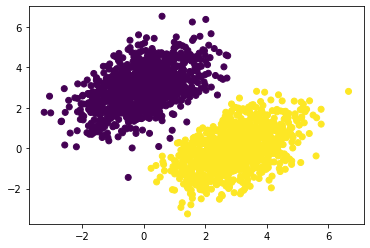

In [26]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

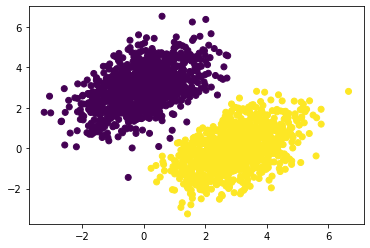

tf.Tensor([0.20875734], shape=(1,), dtype=float32) tf.Tensor([0.7044723], shape=(1,), dtype=float32)


In [27]:
start_end = [[-4.,-4.],[6.,6.]]
line_data = model(start_end)

predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0] > 0.5)
plt.plot(line_data[0],line_data[1],'-r')
plt.show()
print(line_data[0],line_data[1])

In [28]:
line_data

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.20875734],
       [0.7044723 ]], dtype=float32)>